In [154]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt



In [155]:
data_train=pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv',thousands=',')
df_test=pd.read_csv('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv',thousands=',')



In [156]:
rename_dict = {
    'Property\ncrime': 'property_crime',
    'Population': 'population',
    'Murder and\nnonnegligent\nmanslaughter': 'murder_manslaughter',
    'Robbery': 'robbery',
    'Burglary':'burglary',
    'Violent\ncrime':'violent_crime',
    'Rape\n(revised\ndefinition)1':'rape',
    'Rape\n(legacy\ndefinition)2':'rape2',
    'Aggravated\nassult':'aggravated_assult',
    'Larceny-\ntheft':'larceny_theft',
    'Motor\nvehicle\ntheft':'motor_vehicle_theft',
    'Arson3':'arson',
    'Unnamed:13':'unnamed',
}
data_train = data_train.rename(rename_dict, axis='columns')


In [157]:
rename_dict = {
    'Property\ncrime': 'property_crime',
    'Population': 'population',
    'Murder and\nnonnegligent\nmanslaughter': 'murder_manslaughter',
    'Robbery': 'robbery',
    'Burglary':'burglary',
    'Violent\ncrime':'violent_crime',
    'Rape\n(revised\ndefinition)1':'rape',
    'Rape\n(legacy\ndefinition)2':'rape2',
    'Aggravated\nassult':'aggravated_assult',
    'Larceny-\ntheft':'larceny_theft',
    'Motor\nvehicle\ntheft':'motor_vehicle_theft',
    'Arson3':'arson',
    'Unnamed:13':'unnamed',
}
df_test = df_test.rename(rename_dict, axis='columns')


In [158]:
data_train=data_train[['population','murder_manslaughter','robbery','property_crime']].dropna()
df_test=df_test[['population','murder_manslaughter','robbery','property_crime']].dropna()

In [159]:
df_test=df_test[:-20]

In [160]:
data_train.shape

(348, 4)

In [161]:
df_test.shape

(348, 4)

In [183]:
y_train=data_train.property_crime.values.reshape(-1, 1)
X_train=data_train[['population','murder_manslaughter','robbery']]
X_test=df_test[['population','murder_manslaughter','robbery']]
y_test=data_train.property_crime.values.reshape(-1, 1)
X_train.murder_manslaughter[X_train.murder_manslaughter>0]=1
X_test.murder_manslaughter[X_test.murder_manslaughter>0]=1
X_train.robbery[X_train.robbery>0]=1
X_test.robbery[X_test.robbery>0]=1
lr=LinearRegression()

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [191]:

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [185]:
predictions[0:5]

array([[-1.49067428e+00],
       [ 1.17601848e+02],
       [-1.88865540e+01],
       [ 1.52302926e+01],
       [ 2.34523209e+03]])

Text(0, 0.5, 'Predictions')

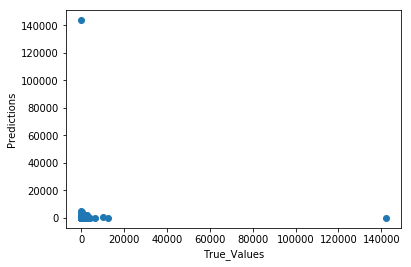

In [186]:
plt.scatter(y_test, predictions)
plt.xlabel('True_Values')
plt.ylabel('Predictions')

In [192]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)


1.0

In [190]:
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)

(348, 1)
(348, 1)
(348, 3)
(348, 3)


In [147]:
mean_squared_error(y_test,y_pred)

118598730.55653535

In [200]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm,X_train,y_train, cv=10)

array([ 0.78335324,  0.61551551, -0.71377834,  0.65084937,  0.47045513,
        0.74332354, -0.1901827 ,  0.60422358,  0.67172605,  0.56082748])

In [202]:
cross_val_score(lm,X_train,y_train, cv=5)

array([0.63477957, 0.38121768, 0.55692069, 0.14479353, 0.64837453])

In [207]:
cross_val_score(lm,y_pred,y_test, cv=5)

array([-0.05034259, -3.41395615, -4.34725875, -0.01675789, -0.21541854])